## Project planning

Glancing at the problem description, this excercise is a binary classification problem - as what is needed is to predict if the vehicle driving mode is either electric or internal combustion powered

- Exploratory analysis:
   - null data present 
   - .describe(): max, mean, median, etc to have an overview of the data
   - Barplots, see distribution
   - Boxplots to identify magnitude differences and outlier

- Create train and test set in 80:20 split. Using train set:
   - Variable correlation

- Try different models and metrics


see (*) for "if I had more time, I would..." comment through the notebook



In [1]:
import os 
import glob
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import scatter_matrix
from zlib import crc32

In [2]:
# start random seed for results reproducibility
random.seed(42)

In [3]:
# combine all csv files
# Understand variables i.e. upper and lower bounds
os.chdir('ds_recruitment_data')
extension = 'csv'
all_files = [i for i in glob.glob('*.{}'.format(extension))]

all_vins = pd.concat([pd.read_csv(i) for i in all_files])
all_vins.to_csv('all_vins.csv', index=False, encoding = 'utf-8-sig')
#encoding = ‘utf-8-sig’ is added to overcome the issue when exporting ‘Non-English’ languages.

In [4]:
#all_vins
all_vins_path = 'all_vins.csv'
df_vins = pd.read_csv(all_vins_path)
df_vins

,device_id,event_time,event_received_time,ignition_status,latitude,longitude,vin,deep_sleep,movement_sensor,gsm_signal_level,...,manifold_abs_pressure,accel_pedal_position,manifold_air_flow_rate,gps_altitude,hybrid_batt_voltage,gps_satellites,engine_speed,adc_external_power_voltage,odometer,mode
0,96901410,1.594877e+12,1594877157908,True,58.750197,25.533668,TESTVIN001,0,1,5,...,NaN,NaN,0.00,62,NaN,12,0.0,14687,NaN,ev
1,96901410,1.594877e+12,1594877157909,True,58.750197,25.533668,TESTVIN001,0,1,5,...,NaN,NaN,0.00,62,NaN,12,0.0,14681,NaN,ev
2,96901410,1.594877e+12,1594877157910,True,58.750197,25.533668,TESTVIN001,0,1,5,...,NaN,NaN,0.00,62,NaN,11,0.0,13571,NaN,ev
3,96901410,1.594877e+12,1594877157912,False,58.750189,25.533660,TESTVIN001,0,1,0,...,NaN,NaN,NaN,69,NaN,11,NaN,12843,NaN,ic
4,96901410,1.594877e+12,1594877167739,True,58.750192,25.533663,TESTVIN001,0,1,0,...,NaN,NaN,0.00,69,NaN,13,0.0,12861,NaN,ev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242809,88610265,1.611483e+12,1611482542754,True,93.670150,106.129501,TESTVIN069,0,1,5,...,8.0,15.0,0.01,7,285.0,19,0.0,14420,11346.0,ev
242810,88610265,1.611483e+12,1611482549309,True,93.670150,106.129501,TESTVIN069,0,1,5,...,8.0,15.0,0.01,7,284.0,19,0.0,14411,11346.0,ev
242811,88610265,1.611483e+12,1611482552060,True,93.670150,106.129501,TESTVIN069,0,1,5,...,8.0,15.0,0.01,7,284.0,19,0.0,14398,11346.0,ev
242812,88610265,1.611483e+12,1611482557240,True,93.670150,106.129501,TESTVIN069,0,1,5,...,8.0,15.0,0.01,7,284.0,18,0.0,14413,11346.0,ev


#### translate driving mode from categorical to continuous vars 

In [5]:
df_vins['ev'] = df_vins['mode'].apply(lambda x: 1 if x == 'ev' else 0) # only for ev as this is our variable of interest
df_vins

,device_id,event_time,event_received_time,ignition_status,latitude,longitude,vin,deep_sleep,movement_sensor,gsm_signal_level,...,accel_pedal_position,manifold_air_flow_rate,gps_altitude,hybrid_batt_voltage,gps_satellites,engine_speed,adc_external_power_voltage,odometer,mode,ev
0,96901410,1.594877e+12,1594877157908,True,58.750197,25.533668,TESTVIN001,0,1,5,...,NaN,0.00,62,NaN,12,0.0,14687,NaN,ev,1
1,96901410,1.594877e+12,1594877157909,True,58.750197,25.533668,TESTVIN001,0,1,5,...,NaN,0.00,62,NaN,12,0.0,14681,NaN,ev,1
2,96901410,1.594877e+12,1594877157910,True,58.750197,25.533668,TESTVIN001,0,1,5,...,NaN,0.00,62,NaN,11,0.0,13571,NaN,ev,1
3,96901410,1.594877e+12,1594877157912,False,58.750189,25.533660,TESTVIN001,0,1,0,...,NaN,NaN,69,NaN,11,NaN,12843,NaN,ic,0
4,96901410,1.594877e+12,1594877167739,True,58.750192,25.533663,TESTVIN001,0,1,0,...,NaN,0.00,69,NaN,13,0.0,12861,NaN,ev,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242809,88610265,1.611483e+12,1611482542754,True,93.670150,106.129501,TESTVIN069,0,1,5,...,15.0,0.01,7,285.0,19,0.0,14420,11346.0,ev,1
242810,88610265,1.611483e+12,1611482549309,True,93.670150,106.129501,TESTVIN069,0,1,5,...,15.0,0.01,7,284.0,19,0.0,14411,11346.0,ev,1
242811,88610265,1.611483e+12,1611482552060,True,93.670150,106.129501,TESTVIN069,0,1,5,...,15.0,0.01,7,284.0,19,0.0,14398,11346.0,ev,1
242812,88610265,1.611483e+12,1611482557240,True,93.670150,106.129501,TESTVIN069,0,1,5,...,15.0,0.01,7,284.0,18,0.0,14413,11346.0,ev,1


## Exploratory analysis

#### view null data 

In [6]:
# understand null vals present
df_vins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242814 entries, 0 to 242813
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   device_id                   242814 non-null  int64  
 1   event_time                  242814 non-null  float64
 2   event_received_time         242814 non-null  int64  
 3   ignition_status             242814 non-null  bool   
 4   latitude                    242814 non-null  float64
 5   longitude                   242814 non-null  float64
 6   vin                         242814 non-null  object 
 7   deep_sleep                  242814 non-null  int64  
 8   movement_sensor             242814 non-null  int64  
 9   gsm_signal_level            242814 non-null  int64  
 10  hybrid_batt_soc             242660 non-null  float64
 11  vehicle_speed               242660 non-null  float64
 12  fuel_Air_ratio              240834 non-null  float64
 13  hybrid_batt_cu

In [7]:
# see how many nulls per column with nulls 
above_0_missing = all_vins.isnull().sum() > 0

all_vins.isnull().sum()[above_0_missing]

hybrid_batt_soc            154
vehicle_speed              154
fuel_Air_ratio            1980
hybrid_batt_current       1980
manifold_abs_pressure     1980
accel_pedal_position      1980
manifold_air_flow_rate     154
hybrid_batt_voltage       1980
engine_speed               154
odometer                  1980
dtype: int64

#### Understanding continuous variables:

In [8]:
df_desc = df_vins.describe()
df_desc

,device_id,event_time,event_received_time,latitude,longitude,deep_sleep,movement_sensor,gsm_signal_level,hybrid_batt_soc,vehicle_speed,...,manifold_abs_pressure,accel_pedal_position,manifold_air_flow_rate,gps_altitude,hybrid_batt_voltage,gps_satellites,engine_speed,adc_external_power_voltage,odometer,ev
count,2.428140e+05,2.428140e+05,2.428140e+05,242814.000000,242814.000000,242814.0,242814.000000,242814.000000,242660.000000,242660.000000,...,240834.0,240834.000000,242660.000000,242814.000000,240834.000000,242814.000000,242660.000000,242814.000000,240834.000000,242814.000000
mean,4.362457e+07,1.610165e+12,1.610165e+12,58.954938,55.429959,0.0,0.999728,3.396032,54.469991,12.695855,...,8.0,26.493560,9.407366,16.077376,276.138668,15.146870,903.177153,14285.079641,10345.845803,0.389508
std,2.826585e+07,1.766864e+09,1.766864e+09,30.571286,38.140477,0.0,0.016485,0.956989,7.852796,10.912755,...,0.0,9.386761,10.082953,29.228847,14.776121,4.265427,755.803304,407.202688,950.036362,0.487640
min,8.561070e+05,1.594877e+12,1.594877e+12,1.092413,-27.454456,0.0,0.000000,0.000000,34.000000,0.000000,...,8.0,15.000000,0.000000,-242.000000,218.000000,0.000000,0.000000,12128.000000,8946.000000,0.000000
25%,1.503806e+07,1.609083e+12,1.609083e+12,41.090217,25.536843,0.0,1.000000,3.000000,48.000000,3.611111,...,8.0,15.000000,0.010000,4.000000,266.000000,13.000000,0.000000,14365.000000,9256.000000,0.000000
50%,4.512817e+07,1.610990e+12,1.610990e+12,58.621445,64.144182,0.0,1.000000,3.000000,53.000000,10.555556,...,8.0,28.000000,5.180000,10.000000,277.000000,16.000000,1250.000000,14391.000000,10864.000000,0.000000
75%,6.044102e+07,1.611231e+12,1.611231e+12,83.024461,84.840155,0.0,1.000000,4.000000,61.000000,19.722222,...,8.0,35.000000,18.620000,20.000000,285.000000,18.000000,1516.000000,14409.000000,11179.000000,1.000000
max,9.690141e+07,1.611483e+12,1.611483e+12,98.865050,142.609160,0.0,1.000000,5.000000,70.000000,33.611111,...,8.0,50.000000,65.560000,338.000000,616.000000,22.000000,3465.000000,14969.000000,11346.000000,1.000000


From df_dec (above) we can infer:

##### questions: (*)
- What is the difference between vehicle speed and gps speed?
- why is ignition status = True when driving mode = ev?


##### Dividing the variables into 4 categories:
- continuous variables or vars_cont
- categorical varibles or vars_cat
- Variables that can be ignored as they are not representative, or vars_ignore
- Variables that I am unsure that would have any impact, would need questioning for those who collected the dataset or PM; labelled as vars_unsure



In [9]:
#org
vars_cont = ['hybrid_batt_soc', 'vehicle_speed', 'fuel_Air_ratio', 'hybrid_batt_current', 'accel_pedal_position', 
            'hybrid_batt_voltage', 'engine_speed', 'adc_external_power_voltage', 'manifold_air_flow_rate' ]

# vars_cont = ['hybrid_batt_soc', 'hybrid_batt_current', 'hybrid_batt_voltage', 'engine_speed' ]

vars_cat = ['ev']
vars_ignore = ['device_id', 'event_time', 'event_received_time', 'ignition_status','latitude','longitude', 'vin','deep_sleep', 
               'movement_sensor', 'manifold_abs_pressure', 'odometer', 'gps_speed']
vars_unsure = ['gsm_signal_level',  'gps_altitude', 'gps_satellites']

vars_training = vars_cont + vars_cat

# len(vars_cont) + len(vars_cat) + len(vars_ignore) + len(vars_unsure) # to ensure all cols accounted for 

#### Understanding data distribution 

array([[<AxesSubplot:title={'center':'hybrid_batt_soc'}>,
        <AxesSubplot:title={'center':'vehicle_speed'}>,
        <AxesSubplot:title={'center':'fuel_Air_ratio'}>],
       [<AxesSubplot:title={'center':'hybrid_batt_current'}>,
        <AxesSubplot:title={'center':'accel_pedal_position'}>,
        <AxesSubplot:title={'center':'hybrid_batt_voltage'}>],
       [<AxesSubplot:title={'center':'engine_speed'}>,
        <AxesSubplot:title={'center':'adc_external_power_voltage'}>,
        <AxesSubplot:title={'center':'manifold_air_flow_rate'}>]],
      dtype=object)

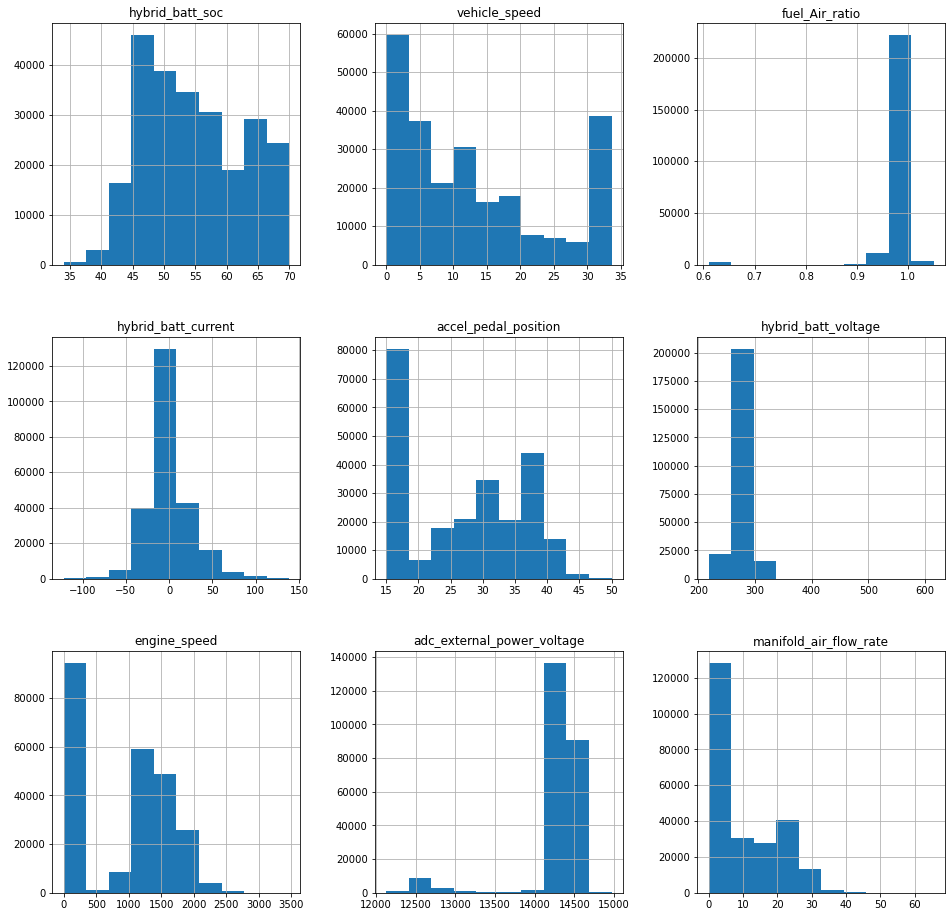

In [10]:
df_vins[vars_cont].hist(figsize=(16,16))
#plt.savefig('histograms.png')

From the histograms we can see that 
Variables that follow a fairly normal distribution:
- hybrid_batt_soc
- hybrid_batt_current
- hybrid_batt_voltage

Variables that need normalisation:

skewed data:
- fuel_Air_ratio 
- manifold_air_flow_rate
- vehicle_speed
- adc_external_power_voltage 

and
- accel_pedal_position
- engine_speed
- odometer
- gps_speed

C:\Users\mvasque1\Anaconda3\envs\dsenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


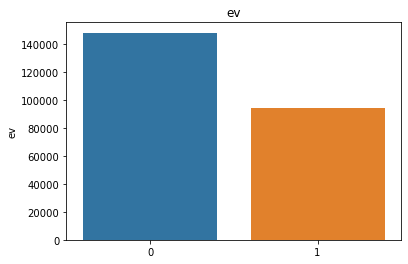

In [11]:
# categorical data, only ev
#sns.barplot(df_vins[vars_cat].value_counts().index)

for i in df_vins[vars_cat]:
    sns.barplot(df_vins[i].value_counts().index,df_vins[i].value_counts()).set_title(i)
    plt.show()


In [12]:
#df_vins.columns

# scatter_matrix(df_vins[vars_cont],figsize=(12,8))

#### understanding value ranges & outliers
overview of all ranges, show the different scales

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'hybrid_batt_soc'),
  Text(2, 0, 'vehicle_speed'),
  Text(3, 0, 'fuel_Air_ratio'),
  Text(4, 0, 'hybrid_batt_current'),
  Text(5, 0, 'accel_pedal_position'),
  Text(6, 0, 'hybrid_batt_voltage'),
  Text(7, 0, 'engine_speed'),
  Text(8, 0, 'adc_external_power_voltage'),
  Text(9, 0, 'manifold_air_flow_rate')])

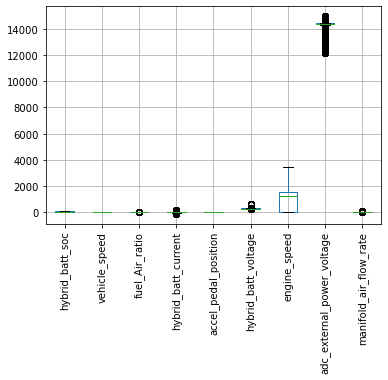

In [13]:
df_vins[vars_cont].boxplot()
plt.xticks(rotation=90)

and to investigate into more detail:

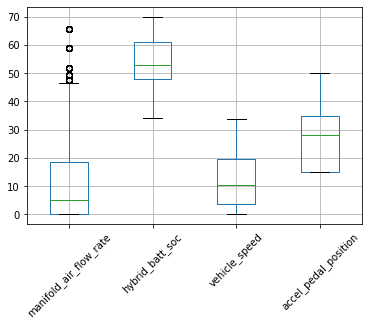

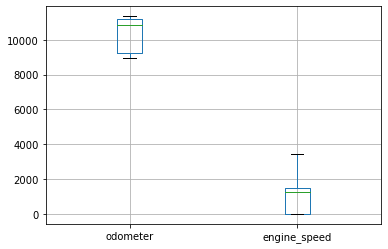

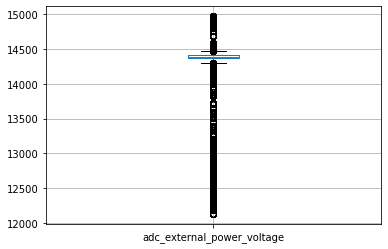

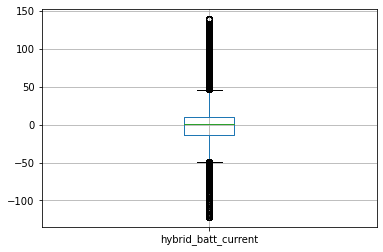

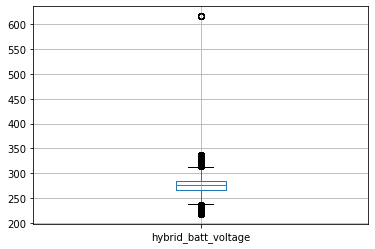

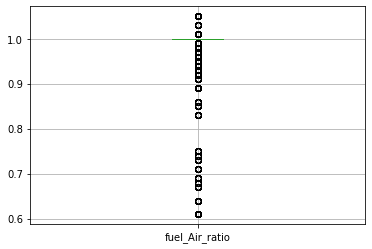

In [14]:
# add boxplots - as not normalised yet, plot in groups of similar units 
# from prev plot, show bar plots 
# for vals between 0 - 100

df_vins.boxplot(column = ['manifold_air_flow_rate', 'hybrid_batt_soc', 
                          'vehicle_speed', 'accel_pedal_position'])
plt.xticks(rotation=45)
#plt.savefig('boxplot_g1'+ '.png', bbox_inches='tight')
plt.show()

df_vins.boxplot(column = ['odometer', 'engine_speed'])
#plt.savefig('boxplot_g2'+ '.png')
plt.show()    

df_vins.boxplot(column = ['adc_external_power_voltage'])
#plt.savefig('boxplot_g3'+ '.png')
plt.show()    

df_vins.boxplot(column = ['hybrid_batt_current'])
#plt.savefig('boxplot_g4'+ '.png')
plt.show()  

df_vins.boxplot(column = ['hybrid_batt_voltage'])
#plt.savefig('boxplot_g5'+ '.png')
plt.show()  

df_vins.boxplot(column = ['fuel_Air_ratio'])
#plt.savefig('boxplot_g6'+ '.png')
plt.show()  

#### see geographical data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

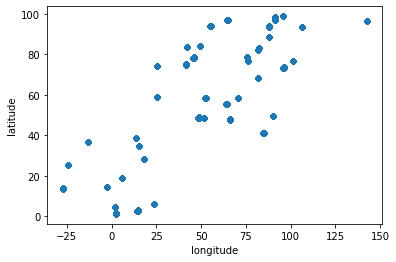

In [15]:
df_vins.plot(kind='scatter', x='longitude', y ='latitude', alpha=0.1)

In [46]:
import plotly.express as px

#uncomment to see-
# fig = px.scatter_geo(df_vins,lat='latitude',lon='longitude')
# fig.update_layout(title = 'World map', title_x=0.5)
# fig.show()

(*) If I had more time:
- as part of data exploration, could see more accurately where the lats and lons are in the map
- can this help us understand any seasonal behaviour? (i.e. electric vehicle mode not turning on properly during winter)
- Coult data help us see behavioural use of ev vs ic per country? that can help inform business decisions for specific market areas

### To avoid "data snooping bias", create train and test sets
No further data exploration below this point with all the dataset, so only use train_set.

To ensure a stable train/test split even when the dataset is refreshed, we need to ensure the train and test data is not mixed, which can be achieved by computing the hash of each instance

In [17]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

train_set, test_set = split_train_test_by_id(df_vins, 0.2, 'device_id')

#### Understand variable correlation

In [18]:
corr = train_set[vars_cont].corr()
corr

,hybrid_batt_soc,vehicle_speed,fuel_Air_ratio,hybrid_batt_current,accel_pedal_position,hybrid_batt_voltage,engine_speed,adc_external_power_voltage,manifold_air_flow_rate
hybrid_batt_soc,1.000000,-0.285037,-0.038759,0.035586,-0.247589,0.438398,-0.143452,0.130819,-0.223332
vehicle_speed,-0.285037,1.000000,-0.019099,-0.055702,0.689204,-0.145200,0.602284,-0.114926,0.707750
fuel_Air_ratio,-0.038759,-0.019099,1.000000,0.032983,0.047055,-0.052241,-0.012061,-0.001931,0.079834
hybrid_batt_current,0.035586,-0.055702,0.032983,1.000000,0.311189,-0.698061,-0.243362,0.013459,-0.171423
accel_pedal_position,-0.247589,0.689204,0.047055,0.311189,1.000000,-0.354302,0.610995,-0.047049,0.713494
hybrid_batt_voltage,0.438398,-0.145200,-0.052241,-0.698061,-0.354302,1.000000,0.106394,0.014625,0.004442
engine_speed,-0.143452,0.602284,-0.012061,-0.243362,0.610995,0.106394,1.000000,-0.001585,0.854866
adc_external_power_voltage,0.130819,-0.114926,-0.001931,0.013459,-0.047049,0.014625,-0.001585,1.000000,-0.039385
manifold_air_flow_rate,-0.223332,0.707750,0.079834,-0.171423,0.713494,0.004442,0.854866,-0.039385,1.000000


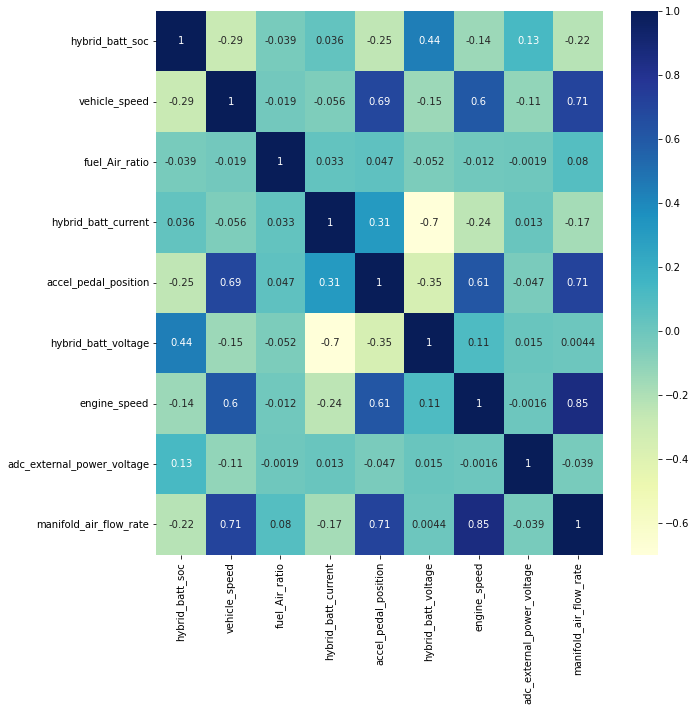

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

#### Compare to dependant variable: if driving in ev mode 

In [20]:
# compare driving mode to other variables
#temp_train_wout_ev = train_set.drop(['ev'],axis=1)
pd.pivot_table(train_set, index='ev', values = vars_cont)

,accel_pedal_position,adc_external_power_voltage,engine_speed,fuel_Air_ratio,hybrid_batt_current,hybrid_batt_soc,hybrid_batt_voltage,manifold_air_flow_rate,vehicle_speed
ev,,,,,,,,,
0,29.948258,14276.818024,1470.859126,0.989566,-3.619739,54.368668,278.163415,15.025654,16.776062
1,20.477927,14261.994873,6.307609,0.996976,8.221799,55.801133,273.743077,0.233548,5.833933


#### data engineering results

In [21]:
#only use the features chosen
train_set = train_set[vars_training]
train_set

,hybrid_batt_soc,vehicle_speed,fuel_Air_ratio,hybrid_batt_current,accel_pedal_position,hybrid_batt_voltage,engine_speed,adc_external_power_voltage,manifold_air_flow_rate,ev
0,49.0,0.0,NaN,NaN,NaN,NaN,0.0,14687,0.00,1
1,49.0,0.0,NaN,NaN,NaN,NaN,0.0,14681,0.00,1
2,49.0,0.0,NaN,NaN,NaN,NaN,0.0,13571,0.00,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12843,NaN,0
4,48.0,0.0,NaN,NaN,NaN,NaN,0.0,12861,0.00,1
...,...,...,...,...,...,...,...,...,...,...
242809,68.0,0.0,1.0,1.8,15.0,285.0,0.0,14420,0.01,1
242810,68.0,0.0,1.0,1.3,15.0,284.0,0.0,14411,0.01,1
242811,68.0,0.0,1.0,2.3,15.0,284.0,0.0,14398,0.01,1
242812,67.0,0.0,1.0,1.8,15.0,284.0,0.0,14413,0.01,1


#### Identifying with missing data

In [23]:
above_0_missing = train_set.isnull().sum() > 0

train_set.isnull().sum()[above_0_missing]

hybrid_batt_soc            132
vehicle_speed              132
fuel_Air_ratio            1958
hybrid_batt_current       1958
accel_pedal_position      1958
hybrid_batt_voltage       1958
engine_speed               132
manifold_air_flow_rate     132
dtype: int64

use SimpleImputer which uses the mean, and MinMaxScaler for feature scaling?
Missing values will be filled with the median. The mean is not chosen as scatter graphs showed a lot of outliers 

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


below works

In [25]:

# vars_with_nans = ['hybrid_batt_soc', 'vehicle_speed','fuel_Air_ratio', 'hybrid_batt_current',  
#     'accel_pedal_position', 'manifold_air_flow_rate', 'hybrid_batt_voltage', 'engine_speed', 'odometer']

# var_cont_pipeline = Pipeline(steps=[
#     ('impute', SimpleImputer(strategy='median')),
#     ('scale', MinMaxScaler())
# ])


# train_set_scaled = train_set.copy()
# train_set_scaled[vars_cont] = var_cont_pipeline.fit_transform(train_set_scaled[vars_cont])
# train_set_scaled

trying other stuff


#### Fill NaNs with median


In [28]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit_transform(train_set)
train_set_filled = train_set.copy()
train_set_filled[vars_cont] = imputer.fit_transform(train_set_filled[vars_cont])

In [29]:
train_set_filled

,hybrid_batt_soc,vehicle_speed,fuel_Air_ratio,hybrid_batt_current,accel_pedal_position,hybrid_batt_voltage,engine_speed,adc_external_power_voltage,manifold_air_flow_rate,ev
0,49.0,0.000000,1.0,1.2,27.0,277.0,0.0,14687.0,0.00,1
1,49.0,0.000000,1.0,1.2,27.0,277.0,0.0,14681.0,0.00,1
2,49.0,0.000000,1.0,1.2,27.0,277.0,0.0,13571.0,0.00,1
3,53.0,10.277778,1.0,1.2,27.0,277.0,1248.0,12843.0,4.88,0
4,48.0,0.000000,1.0,1.2,27.0,277.0,0.0,12861.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
242809,68.0,0.000000,1.0,1.8,15.0,285.0,0.0,14420.0,0.01,1
242810,68.0,0.000000,1.0,1.3,15.0,284.0,0.0,14411.0,0.01,1
242811,68.0,0.000000,1.0,2.3,15.0,284.0,0.0,14398.0,0.01,1
242812,67.0,0.000000,1.0,1.8,15.0,284.0,0.0,14413.0,0.01,1


#### scale inputs

In [30]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score


# input arrays
X_train, y_train = train_set_filled.drop('ev', axis=1), train_set_filled['ev']


test_set = test_set.dropna()
X_test = test_set[vars_cont]
y_test = test_set['ev']

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


array([[<AxesSubplot:title={'center':'hybrid_batt_soc'}>,
        <AxesSubplot:title={'center':'vehicle_speed'}>,
        <AxesSubplot:title={'center':'fuel_Air_ratio'}>],
       [<AxesSubplot:title={'center':'hybrid_batt_current'}>,
        <AxesSubplot:title={'center':'accel_pedal_position'}>,
        <AxesSubplot:title={'center':'hybrid_batt_voltage'}>],
       [<AxesSubplot:title={'center':'engine_speed'}>,
        <AxesSubplot:title={'center':'adc_external_power_voltage'}>,
        <AxesSubplot:title={'center':'manifold_air_flow_rate'}>]],
      dtype=object)

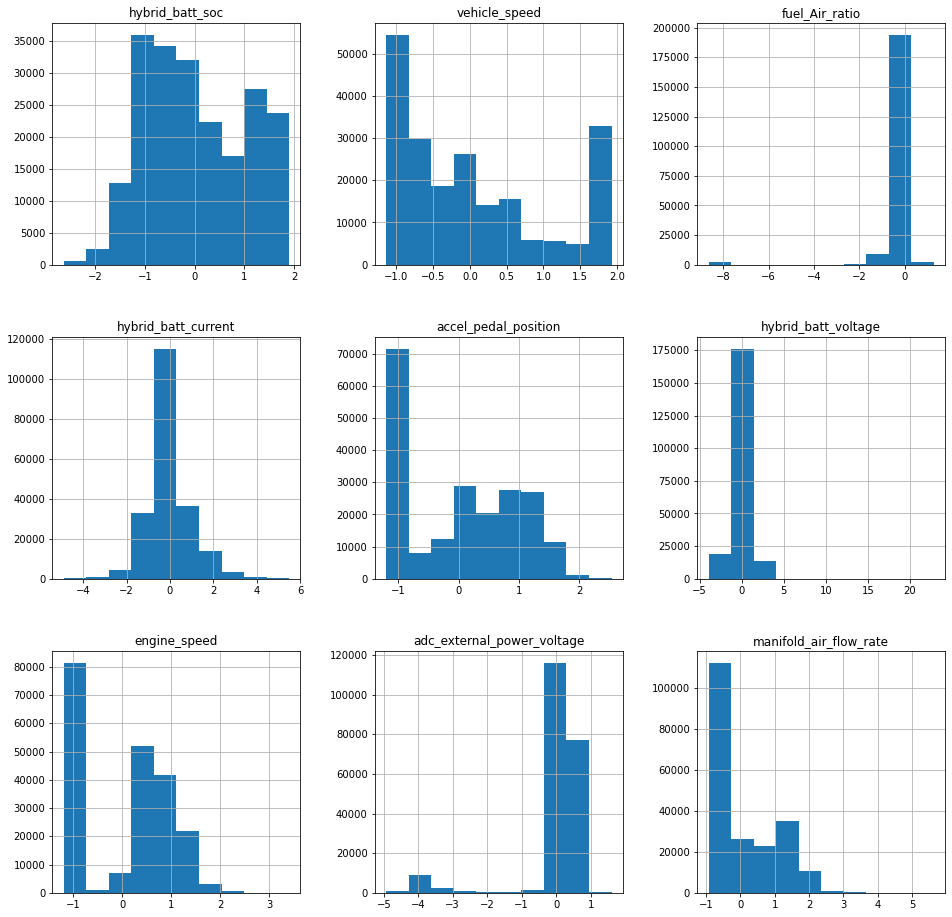

In [31]:
X_train_df = pd.DataFrame(X_train,columns=vars_cont)
X_train_df.hist(figsize=(16,16))

(*) look more into data distributions


skewed data:
- fuel_Air_ratio 
- hybrid_batt_voltage
- adc_external_power_voltage 
- manifold_air_flow_rate


and
- vehicle_speed
- accel_pedal_position
- engine_speed
- odometer
- gps_speed

## Model creation

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier


###### LogisticRegression

In [33]:
lr = LogisticRegression(max_iter = 2000)
cross_val = cross_val_score(lr, X_train,y_train,cv=5)
print(f'mean: {cross_val.mean()} | cross val: {cross_val}  ')


mean: 0.9998944702636026 | cross val: [0.99988008 0.99990407 0.99988008 0.99990406 0.99990406]  


##### Naive Bayes

In [34]:
nb = GaussianNB()
cross_val = cross_val_score(nb, X_train, y_train, cv=5)
print(f'mean: {cross_val.mean()} | cross val: {cross_val}  ')


mean: 0.9916631495590913 | cross val: [0.99155774 0.99165368 0.99196527 0.99138965 0.99174941]  


##### Randomforrest classifier


In [35]:
rf = RandomForestClassifier(random_state = 1)
cross_val = cross_val_score(rf, X_train, y_train,cv=5)
print(f'mean: {cross_val.mean()} | cross val: {cross_val}  ')
# rf.fit(X_train, y_train)

# predict_rfc = rf.predict(X_test)

mean: 1.0 | cross val: [1. 1. 1. 1. 1.]  


##### Decision tree

In [36]:
dtc = tree.DecisionTreeClassifier(random_state = 1)
cross_val = cross_val_score(dtc, X_train,y_train,cv=5)
print(f'mean: {cross_val.mean()} | cross val: {cross_val}  ')

mean: 1.0 | cross val: [1. 1. 1. 1. 1.]  


###### XGBoost

In [37]:
xgb = XGBClassifier(random_state =1)
cross_val = cross_val_score(xgb, X_train,y_train,cv=5)
print(f'mean: {cross_val.mean()} | cross val: {cross_val}  ')

[10:24:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mvasque1\Anaconda3\envs\dsenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:24:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:24:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:24:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

##### fit

In [38]:
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
rf.fit(X_train, y_train)
dtc.fit(X_train, y_train)
xgb.fit(X_train, y_train)

C:\Users\mvasque1\Anaconda3\envs\dsenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### predict

In [39]:
pred_lr = lr.predict(X_test)
pred_nb = nb.predict(X_test)
pred_rf = rf.predict(X_test)
pred_dtc = dtc.predict(X_test)
pred_xgb = xgb.predict(X_test)

#### perf

In [40]:
print('LogisticRegression\n', confusion_matrix(y_test, pred_lr))
print('\nBayes\n', confusion_matrix(y_test, pred_nb))
print('\nRandom Forrest\n', confusion_matrix(y_test, pred_rf))
print('\nDec trees\n', confusion_matrix(y_test, pred_dtc))
print('\nxgboost\n', confusion_matrix(y_test, pred_xgb))



LogisticRegression
 [[21274     0]
 [    0 13046]]

Bayes
 [[21274     0]
 [  286 12760]]

Random Forrest
 [[21274     0]
 [    0 13046]]

Dec trees
 [[21274     0]
 [    0 13046]]

xgboost
 [[21274     0]
 [    0 13046]]


In [41]:
# roc 

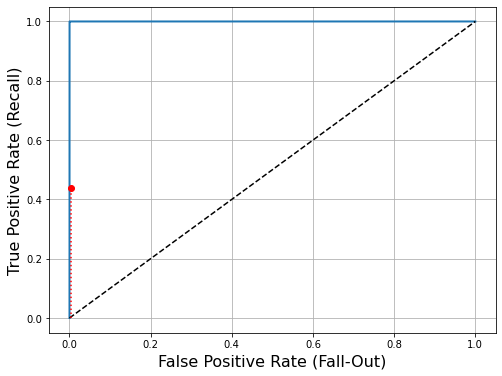

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


y_scores = cross_val_predict(lr, X_train, y_train, cv=3,
                             method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)



def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal    
    #plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
#save_fig("roc_curve_plot")                         # Not shown
plt.show()

(*)
All models show no false negatives or false positives
True negatives and true positives are correctly classified

The results, although promising, I am skepticall of the great performance. If I had more time, I would triple check I am not mixing training and test data and would add more performance metrics to ensure good model performance.

